In [1]:
library(glmnet)
rm(list=ls())
source("/Users/canyang/Documents/github_Yang/statistical-learning/Statistical-Machine-Learning/Lasso.R")
# set.seed(10)
ntrain <- 100
p <- 1000
c0 <- 2
xtrain <- 2*matrix(rnorm(ntrain*p),ntrain,p) + c0
xtrain[,1] <- xtrain[,1] * 3

b <- rep(0,p)
b[1:10] <- rnorm(10)

b0 <- 1
ytrain <- xtrain%*%b + b0 + rnorm(ntrain,0,sqrt(var(xtrain%*%b)))#rnorm(ntrain,0,1)

# centerize xtrain
cc <- colMeans(xtrain)
xtrain2 <- t(t(xtrain) - cc)

# standardize xtrain?
standardizeX <- T

if(standardizeX){
  s <- sqrt(colMeans(xtrain2^2))
  xtrain2 <- t(t(xtrain2)/s)
}

# get lambda sequence
MaxLam <- max(abs(t(xtrain2)%*%ytrain))
loglam <- seq(log10(MaxLam),log10(0.2*MaxLam),length.out = 100)
# loglam <- seq(2*log10(p^2),-log10(p^2),length.out = 100)
lam <- 10^(loglam)#exp(loglam)



Loading required package: Matrix
Loading required package: Matrix
Loading required package: foreach
Loading required package: foreach
Loaded glmnet 2.0-16

Loaded glmnet 2.0-16



In [2]:
# fit using glmnet
fitglmnet <- glmnet(xtrain,ytrain,alpha=1,lambda = lam/ntrain,standardize = T,thresh = 1e-10)

fitLasso1 <- Lasso(xtrain,ytrain,center = T,scale = T,lambda = lam,method="ACD")
fitLasso2 <- Lasso(xtrain,ytrain,center = T,scale = T,lambda = lam,method="CD")
fitLasso3 <- Lasso(xtrain,ytrain,center = T,scale = T,lambda = lam,method="GD")
fitLasso4 <- Lasso(xtrain,ytrain,center = T,scale = T,lambda = lam,method="AGD")



 Finished!	 1  outer loops;	 0  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  inner loops
 Finished!	 2  outer loops;	 1  

 Finished!	 1  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2  loops
 Finished!	 2

 Finished!	 1  loops
 Finished!	 461  loops
 Finished!	 448  loops
 Finished!	 448  loops
 Finished!	 448  loops
 Finished!	 448  loops
 Finished!	 448  loops
 Finished!	 435  loops
 Finished!	 435  loops
 Finished!	 435  loops
 Finished!	 435  loops
 Finished!	 435  loops
 Finished!	 422  loops
 Finished!	 422  loops
 Finished!	 422  loops
 Finished!	 422  loops
 Finished!	 422  loops
 Finished!	 409  loops
 Finished!	 409  loops
 Finished!	 409  loops
 Finished!	 409  loops
 Finished!	 409  loops
 Finished!	 396  loops
 Finished!	 396  loops
 Finished!	 396  loops
 Finished!	 396  loops
 Finished!	 396  loops
 Finished!	 383  loops
 Finished!	 383  loops
 Finished!	 383  loops
 Finished!	 383  loops
 Finished!	 383  loops
 Finished!	 370  loops
 Finished!	 370  loops
 Finished!	 370  loops
 Finished!	 370  loops
 Finished!	 357  loops
 Finished!	 357  loops
 Finished!	 357  loops
 Finished!	 357  loops
 Finished!	 357  loops
 Finished!	 344  loops
 Finished!	 344  loops
 Finished!	 3

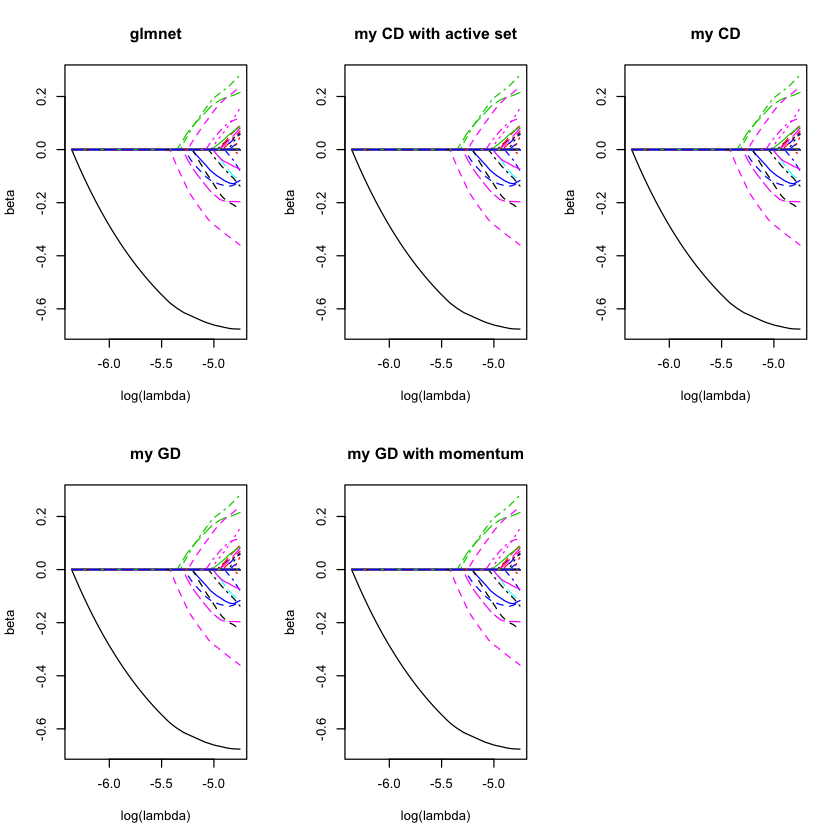

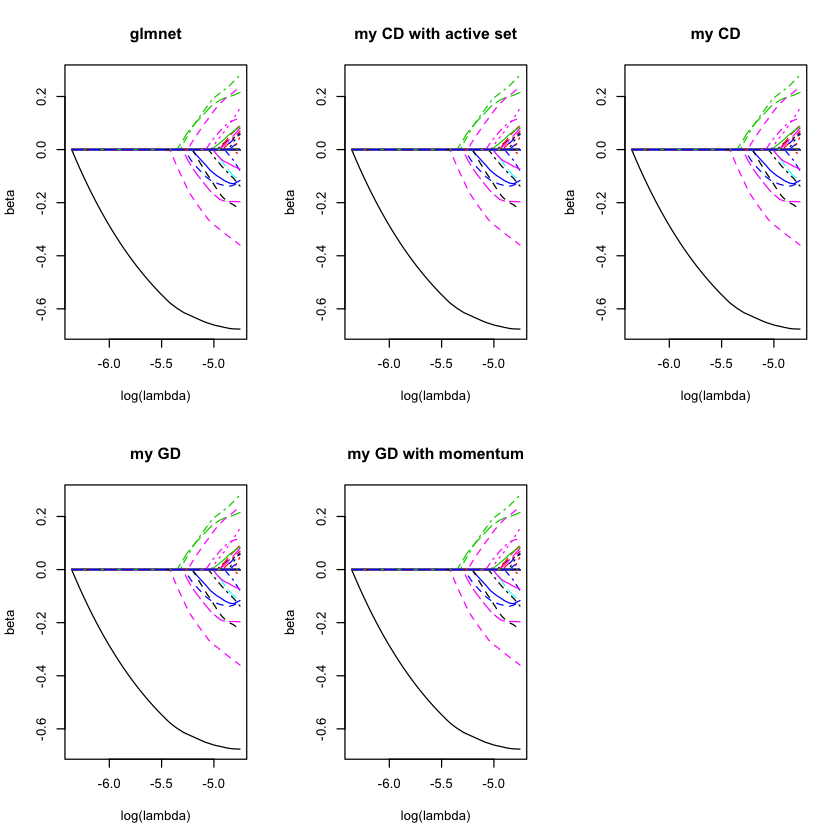

In [3]:
par(mfrow=c(2,3))
# matplot(-log(lam),t(fitglmnet$beta),pch=20)
# matplot(-log(lam),t(fitLasso$beta),pch=20)
matplot(-log(lam),t(fitglmnet$beta),type="l",xlab="log(lambda)",ylab="beta",main="glmnet")
matplot(-log(lam),t(fitLasso1$beta),type="l",xlab="log(lambda)",ylab="beta",main="my CD with active set")
matplot(-log(lam),t(fitLasso2$beta),type="l",xlab="log(lambda)",ylab="beta",main="my CD")
matplot(-log(lam),t(fitLasso3$beta),type="l",xlab="log(lambda)",ylab="beta",main="my GD")
matplot(-log(lam),t(fitLasso4$beta),type="l",xlab="log(lambda)",ylab="beta",main="my GD with momentum")



In [4]:


rm(list=ls())
source("/Users/canyang/Documents/github_Yang/statistical-learning/Statistical-Machine-Learning/Lasso.R")

n_rep <- 10

err <- vector("list",4)
err[[1]] <- err[[2]] <- err[[3]] <- err[[4]] <- vector("list",10)



for(i in 1:n_rep){
  ntrain <- 100
  p <- 1000
  c0 <- 2
  # xtrain <- matrix(rnorm(ntrain*p),ntrain,p)
  xtrain <- 2*matrix(rnorm(ntrain*p),ntrain,p) + c0
  xtrain[,1] <- xtrain[,1] * 3
  
  b <- rep(0,p)
  b[1:10] <- rnorm(10)
  
  b0 <- 1
  ytrain <- xtrain%*%b + b0 + rnorm(ntrain,0,sqrt(9*var(xtrain%*%b)))
  
  # centerize xtrain
  cc <- colMeans(xtrain)
  xtrain2 <- t(t(xtrain) - cc)
  
  # standardize xtrain?
  standardizeX <- T
  
  if(standardizeX){
    s <- sqrt(colMeans(xtrain2^2))
    xtrain2 <- t(t(xtrain2)/s)
  }
  
  # get lambda sequence
  MaxLam <- max(abs(t(xtrain2)%*%ytrain))
  loglam <- seq(log10(MaxLam),log10(0.2*MaxLam),length.out = 100)
  # loglam <- seq(2*log10(p^2),-log10(p^2),length.out = 100)
  lam <- 10^(loglam)#exp(loglam)
  
  fitLasso1 <- Lasso(xtrain,ytrain,center = T,scale = T,lambda = lam[50],method="ACD")
  fitLasso2 <- Lasso(xtrain,ytrain,center = T,scale = T,lambda = lam[50],method="CD")
  fitLasso3 <- Lasso(xtrain,ytrain,center = T,scale = T,lambda = lam[50],method="GD")
  fitLasso4 <- Lasso(xtrain,ytrain,center = T,scale = T,lambda = lam[50],method="AGD")
  
  # err[[1]][[i]] <- log(fitLasso1$obj[[1]]-tail(fitLasso1$obj[[1]],1))
  # err[[2]][[i]] <- log(fitLasso2$obj[[1]]-tail(fitLasso2$obj[[1]],1))
  # err[[3]][[i]] <- log(fitLasso3$obj[[1]]-tail(fitLasso3$obj[[1]],1))
  # err[[4]][[i]] <- log(fitLasso4$obj[[1]]-tail(fitLasso4$obj[[1]],1))
  
  err[[1]][[i]] <- (fitLasso1$obj[[1]]-tail(fitLasso1$obj[[1]],1))/tail(fitLasso1$obj[[1]],1)
  err[[2]][[i]] <- (fitLasso2$obj[[1]]-tail(fitLasso2$obj[[1]],1))/tail(fitLasso2$obj[[1]],1)
  err[[3]][[i]] <- (fitLasso3$obj[[1]]-tail(fitLasso3$obj[[1]],1))/tail(fitLasso3$obj[[1]],1)
  err[[4]][[i]] <- (fitLasso4$obj[[1]]-tail(fitLasso4$obj[[1]],1))/tail(fitLasso4$obj[[1]],1)
}



 Finished!	 4  outer loops;	 28  inner loops
 Finished!	 15  loops
 Finished!	 453  loops
 Finished!	 727  loops
 Finished!	 4  outer loops;	 24  inner loops
 Finished!	 16  loops
 Finished!	 466  loops
 Finished!	 999  loops
 Finished!	 4  outer loops;	 25  inner loops
 Finished!	 15  loops
 Finished!	 482  loops
 Finished!	 999  loops
 Finished!	 4  outer loops;	 51  inner loops
 Finished!	 28  loops
 Finished!	 803  loops
 Finished!	 999  loops
 Finished!	 4  outer loops;	 27  inner loops
 Finished!	 18  loops
 Finished!	 518  loops
 Finished!	 778  loops
 Finished!	 5  outer loops;	 40  inner loops
 Finished!	 17  loops
 Finished!	 478  loops
 Finished!	 999  loops
 Finished!	 5  outer loops;	 79  inner loops
 Finished!	 32  loops
 Finished!	 897  loops
 Finished!	 830  loops
 Finished!	 4  outer loops;	 19  inner loops
 Finished!	 11  loops
 Finished!	 352  loops
 Finished!	 990  loops
 Finished!	 4  outer loops;	 47  inner loops
 Finished!	 30  loops
 Finished!	 900  loops
 Finis

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 538 rows containing missing values (geom_path).”Warning message:
“Removed 538 rows containing missing values (geom_path).”

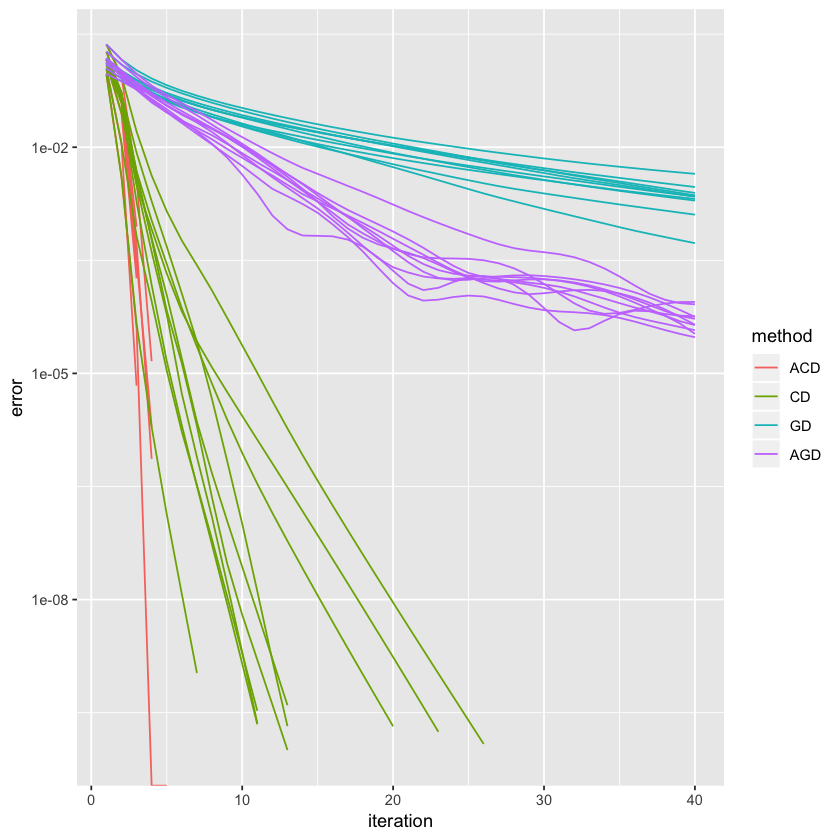

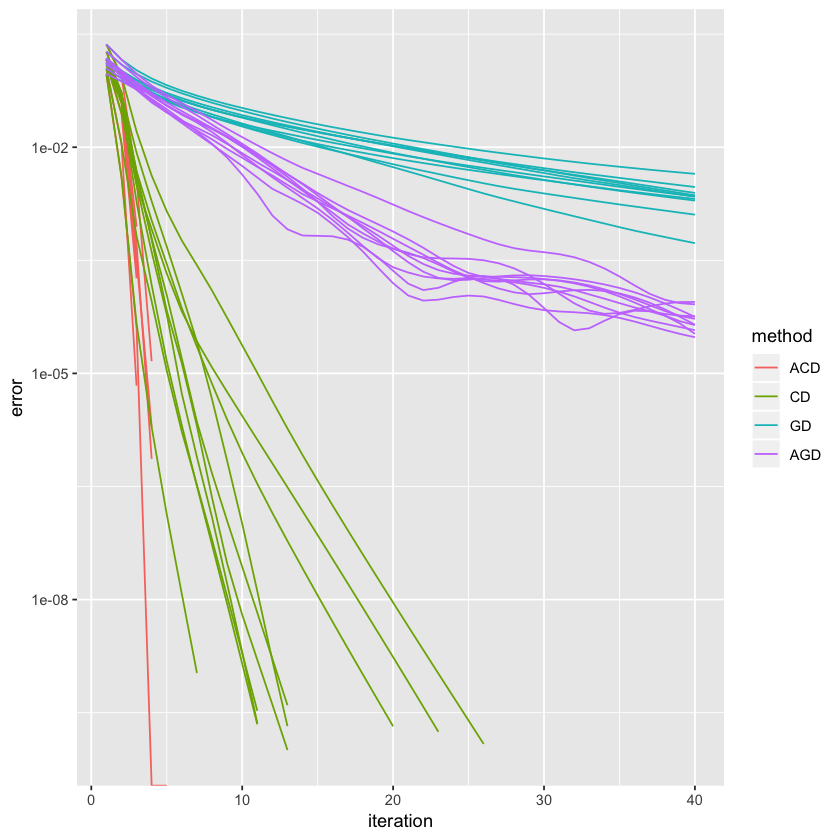

In [5]:
library(ggplot2)
cutoff <- 40
method <- c("ACD","CD","GD","AGD")
out <- data.frame()

i_line <- 0
for(k in 1:4){
  for(i in 1:n_rep){
    i_line <- i_line + 1
    out <- rbind(out,data.frame((err[[k]][[i]][1:cutoff]),1:cutoff,method[k],i_line),row.names=NULL)
  }
}
out <- do.call(data.frame,lapply(out, function(x) replace(x, is.infinite(x),NA)))
names(out) <- c("error","iteration","method","line")
ggplot(out,aes(y=error,x=iteration,color=method,group=line)) +
  geom_line() + scale_y_log10(limits=c(1e-10,NA))